In [107]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import os
import scipy.io
import scipy.signal
from math import nan

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import tensorflow as tf
np.random.seed(1337)

In [118]:
def select(pattern, deg, start, end):
    folder = r"D:\test_development\Battery\data1\LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/" + str(deg) + "degC/"

    df = pd.DataFrame()

    for filename in [file for file in os.listdir(folder) if pattern in file][start:end]:
        file_df = pd.read_csv(folder + filename, usecols=[0, 8, 9, 10, 11], skiprows=29, names=['Time Stamp','Voltage', 'Current', 'Temperature', 'Capacity'])
        file_df.loc[file_df['Time Stamp'].str.len() < 15, 'Time Stamp'] = file_df['Time Stamp'] + ' 12:00:00 AM'
        file_df = file_df[1:]

        type_dict = {'Voltage':'float', 'Current':'float', 'Temperature':'float', 'Capacity':'float'}
        file_df['Time Stamp'] = pd.to_datetime(file_df['Time Stamp'], format='%m/%d/%Y %I:%M:%S %p')
        file_df = file_df.astype(type_dict)

        file_df.drop_duplicates(inplace=True, ignore_index=True, subset='Time Stamp')

        file_df.set_index('Time Stamp', inplace=True)
        file_df = file_df.resample('1S').interpolate(method='linear')
        file_df.reset_index(inplace=True)

        df = pd.concat([df, file_df], axis=0, ignore_index=True)


    df.drop_duplicates(inplace=True, ignore_index=True, subset='Time Stamp')
    df.sort_values(by=['Time Stamp'])

    return df
    
def train_test_plot(x, y):
    df = pd.concat([x, y], axis=1)
    df.iloc[:,0].plot(figsize=(16, 4), legend=True)
    df.iloc[:,1].plot(figsize=(16, 4), legend=True)
    df.iloc[:,2].plot(figsize=(16, 4), legend=True)
    df.iloc[:,3].plot(figsize=(16, 4), legend=True)
    df.iloc[:,4].plot(figsize=(16, 4), legend=True)
    df.iloc[:,5].plot(figsize=(16, 4), legend=True)
    plt.legend(['Voltage', 'Current', 'Temperature', 'Avg. Voltage', 'Avg. Current', 'Capacity'])
    plt.title("Line Graph")
    plt.show()

def handle(x_df, y_df):
    x_df.fillna(method='ffill', inplace=True)
    y_df.fillna(method='ffill', inplace=True)
    x_df = (x_df - x_df.min()) / (x_df.max() - x_df.min())
    y_df = (y_df % 3) / 3

    b, a = scipy.signal.butter(1, 0.001, btype='lowpass', output='ba')
    x_df['Avg. Voltage'] = scipy.signal.filtfilt(b, a, x_df.loc[:,'Voltage'])
    x_df['Avg. Current'] = scipy.signal.filtfilt(b, a, x_df.loc[:,'Current'])
    return x_df, y_df

def combine(dfs):
    x_all = pd.DataFrame()
    y_all = pd.DataFrame()
    for df in dfs:
        x_df = pd.DataFrame(df[['Voltage', 'Current', 'Temperature']])
        y_df = pd.DataFrame(df['Capacity'])

        x_all = pd.concat([x_all, x_df], ignore_index=True)
        y_all = pd.concat([y_all, y_df], ignore_index=True)

    return x_all, y_all

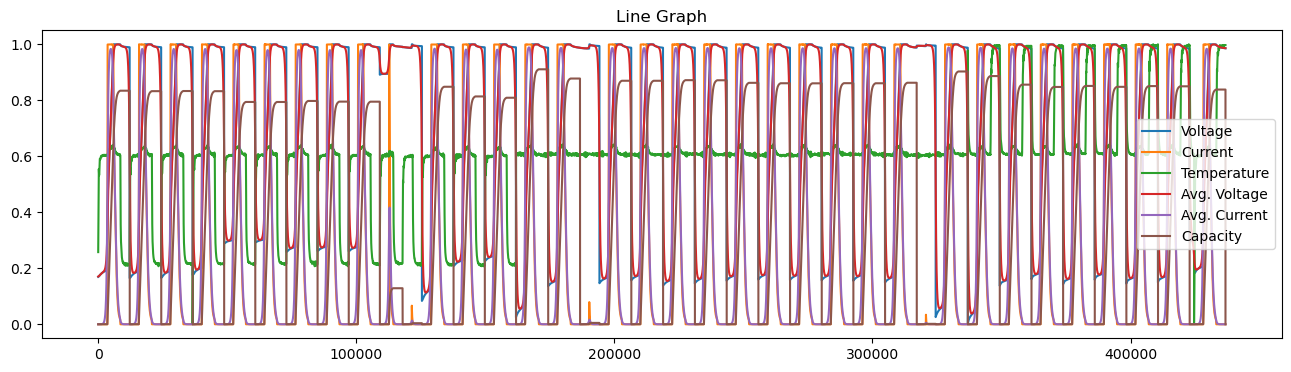

c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


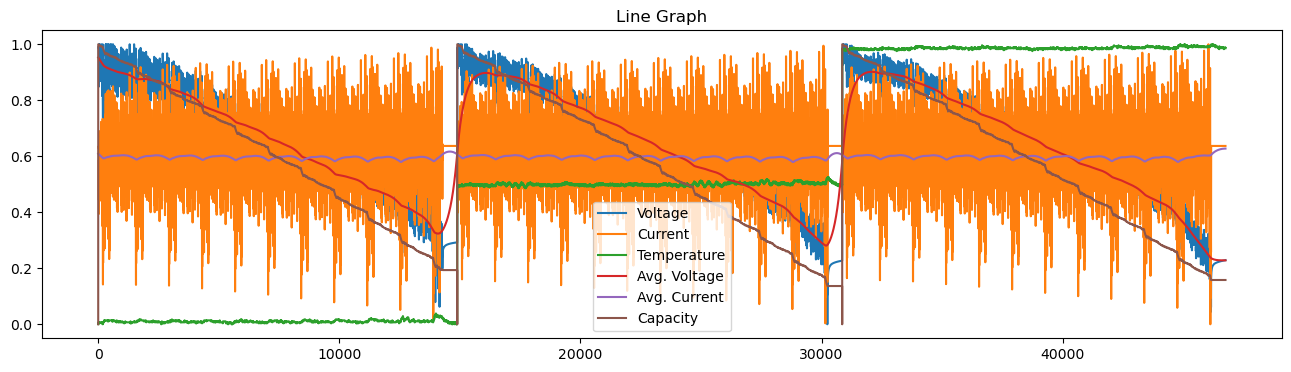

c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3473: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  as

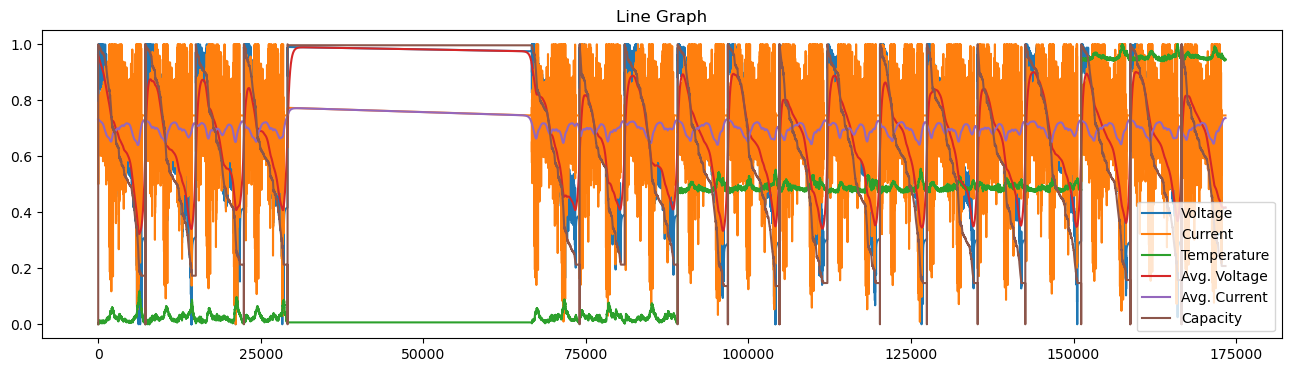

In [141]:
low = select('Charge', 10, 0, None)
mid = select('Charge', 25, 2, None)
high = select('Charge', 40, 1, 10)
x_train, y_train = combine([low, mid, high])
x_train, y_train = handle(x_train, y_train)
train_test_plot(x_train, y_train)

low = select('UDDS', 10, 0, None)
mid = select('UDDS', 25, 0, None)
high = select('UDDS', 40, 0, None)
x_val, y_val = combine([low, mid, high])
x_val, y_val = handle(x_val, y_val)
train_test_plot(x_val, y_val)

low = select('Mix', 10, 0, None)
mid = select('Mix', 25, 0, None)
high = select('Mix', 40, 0, -5)
x_test, y_test = combine([low, mid, high])
x_test, y_test = handle(x_test, y_test)
train_test_plot(x_test, y_test)

In [133]:
def clipped_relu(x):
    return tf.keras.activations.relu(x, max_value=1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(21, activation='tanh'),
  tf.keras.layers.Dense(19, activation=tf.keras.layers.LeakyReLU(alpha=0.3)),
  tf.keras.layers.Dense(1, activation=clipped_relu)
])

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
  loss='mse',
)


history = model.fit(
  x_train.values,
  y_train.values,
  epochs=100,
  validation_data=(x_val, y_val),
  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)],
  batch_size=256
)

Train on 436800 samples, validate on 46756 samples
Epoch 1/100
436800/436800 [==============================] - 3s 6us/sample - loss: 0.1577 - val_loss: 0.0560
Epoch 2/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0592 - val_loss: 0.0506
Epoch 3/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0501 - val_loss: 0.0543
Epoch 4/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0470 - val_loss: 0.0507
Epoch 5/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0446 - val_loss: 0.0474
Epoch 6/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0429 - val_loss: 0.0452
Epoch 7/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0417 - val_loss: 0.0449
Epoch 8/100
436800/436800 [==============================] - 2s 5us/sample - loss: 0.0411 - val_loss: 0.0442
Epoch 9/100
436800/436800 [==============================] - 2s 5us/sample - 

173370/173370 [==============================] - 3s 18us/sample - loss: 0.0490


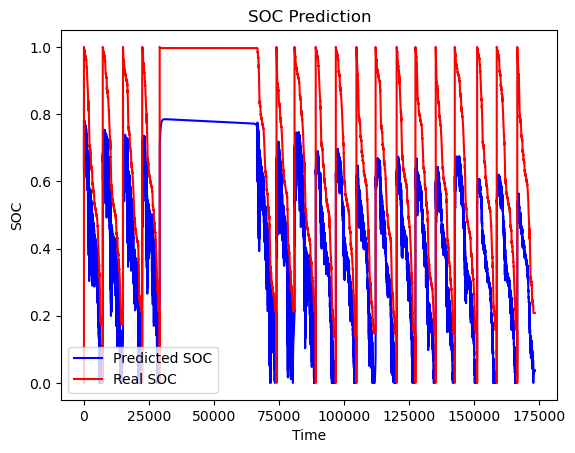

In [142]:
model.evaluate(x_test, y_test)

prediction = model.predict(x_test)
real = y_test.reset_index(drop=True)

# Visualising the results
plt.plot(prediction, color = 'blue', label = 'Predicted SOC')
plt.plot(real, color = 'red', label = 'Real SOC')
plt.title('SOC Prediction')
plt.xlabel('Time')
plt.ylabel('SOC')
plt.legend()
plt.show()

c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


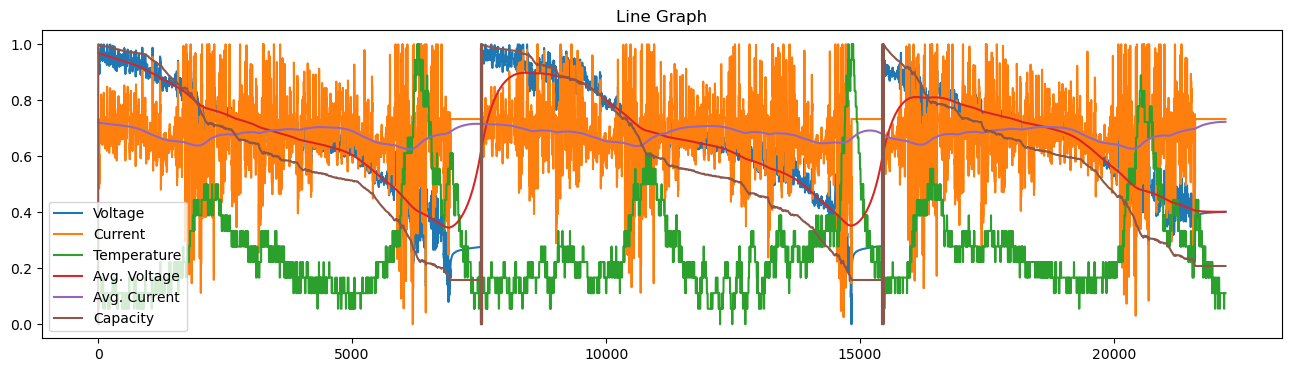

In [140]:
folder = r"D:\test_development\Battery\data1\LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/40degC/"

df = pd.DataFrame()

for filename in [file for file in os.listdir(folder) if 'Mix' in file][0:-5]:
    file_df = pd.read_csv(folder + filename, usecols=[0, 8, 9, 10, 11], skiprows=29, names=['Time Stamp','Voltage', 'Current', 'Temperature', 'Capacity'])
    file_df.loc[file_df['Time Stamp'].str.len() < 15, 'Time Stamp'] = file_df['Time Stamp'] + ' 12:00:00 AM'
    file_df = file_df[1:]

    type_dict = {'Voltage':'float', 'Current':'float', 'Temperature':'float', 'Capacity':'float'}
    file_df['Time Stamp'] = pd.to_datetime(file_df['Time Stamp'], format='%m/%d/%Y %I:%M:%S %p')
    file_df = file_df.astype(type_dict)

    file_df.drop_duplicates(inplace=True, ignore_index=True, subset='Time Stamp')

    file_df.set_index('Time Stamp', inplace=True)
    file_df = file_df.resample('1S').interpolate(method='linear')
    file_df.reset_index(inplace=True)

    df = pd.concat([df, file_df], axis=0, ignore_index=True)

df.drop_duplicates(inplace=True, ignore_index=True, subset='Time Stamp')
df.sort_values(by=['Time Stamp'])

x_df = pd.DataFrame(df[['Voltage', 'Current', 'Temperature']])
y_df = pd.DataFrame(df['Capacity'])
x_df, y_df = handle(x_df, y_df)
train_test_plot(x_df, y_df)